<a href="https://colab.research.google.com/github/petervcvives/CursusML/blob/main/02_introduction/Thermostat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

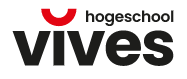<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academic year 2023-2024<br>
Andy Louwyck

---



---



# Thermostat Example

This introductory assignment aims to explain the difference between traditional programming and classical AI on the one hand and machine learning on the other, as depicted in the figure below:

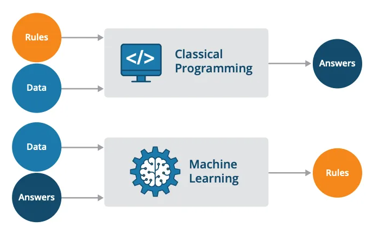

The first exercise is about writing a traditional program, whereas the second one is a machine learning example. Try to explain why using the figure provided above!

## Exercise 1

Write a simple Python program that accepts a temperature value as input and that outputs whether the heating is on or off. Apply the following rule: if the temperature is lower than 17 degrees Celsius, then the heating is on, otherwise it is off.

Use function `input` to ask the user what the temperature is, after which the given input temperature is printed along with the status of the heating.

In [1]:

def heating(temp, heaterONtemp):
  if (temp <= heaterONtemp):
    print("Heating is ON")
  else:
    print("Heating is OFF")

temp = int(input("Enter temperature (celcius):"))
print(f'Temperature is {temp}')
heating(temp,17)

Enter temperature (celcius):10
Temperature is 10
Heating is ON


## Excercise 2

Read the dataset stored in file `'thermostat.csv'` and explore the data. It contains `'temperature'` data and corresponding labels indicating whether the `'heating'` is `'on'` or `'off'`.

Modify your code from *Exercise 1* so that it doesn't apply the 17°C rule, but instead determines the status of the heating from the given temperature data. Try to write code that works for any given dataset containing the `'temperature'` and `'heating'` features!

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [19]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/CusrusML/thermostat.csv')

df



,temperature,heating
0,19.5,off
1,21.2,off
2,20.0,off
3,19.4,off
4,18.2,on
...,...,...
95,15.8,on
96,19.9,off
97,14.2,on
98,22.3,off


from matplotlib import pyplot as plt
df['temperature'].plot(kind='hist', bins=20, title='temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('heating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['temperature'].plot(kind='line', figsize=(8, 4), title='temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['heating'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='temperature', y='heating', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Heating on value calulated using average value
We calculate the average value by searching for the maximim (where the hearting has been switched off) and the minimum (where the heating has been switched on)

In [5]:
maxtemp = df.loc[df["heating"] == 'off']['temperature'].max()
mintemp = df.loc[df["heating"] == 'on']['temperature'].min()

print(f'max temp: {maxtemp}, min temp: {mintemp}')

averagetemp = (maxtemp +mintemp) /2
print(f'avarage temp: {averagetemp}')

temp = int(input("Enter temperature (celcius):"))
heating(temp,averagetemp)

max temp: 23.9, min temp: 14.2
avarage temp: 19.049999999999997
Enter temperature (celcius):10
Heating is ON


---

### K Nearest neigbors

In [60]:
temp = float(input("Enter temperature (celcius):"))
knnindex = (df.temperature - temp).abs().argmin()
knnstate = df.loc[knnindex,"heating"]
print(f"De verwaing staat {knnstate}")
print(f"knn:")
df.loc[knnindex]

Enter temperature (celcius):10
De verwaing staat off
knn:


,99
temperature,14.0
heating,off


In [49]:
# temp = float(input("Enter temperature (celcius):"))
#df.loc[(df.temperature - temp).abs().argmin()]
#df.temperature
#df.heating